In [5]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [11]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

myaccuracies = model_lor.predict(X)
print('model_lor의 정확도는: {0:.4f}'.format(accuracy_score(y, myaccuracies)))

model_lor의 정확도는: 0.9121


* 정밀도

In [21]:
myprecisions = model_lor.predict(X)
print('model_lor의 정밀도는: {0:.4f}'.format(precision_score(y, myprecisions)))

model_lor의 정밀도는: 0.9010


* 재현율

In [23]:
myrecalls = model_lor.predict(X)
print('model_lor의 재현율는: {0:.4f}'.format(recall_score(y, myrecalls)))

model_lor의 재현율는: 0.8585


* F1 score

In [25]:
from sklearn.metrics import f1_score
f1 = f1_score(y, y_pred)
print('F1 스코어 : {0: 4f}'.format(f1))

F1 스코어 :  0.879227


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [49]:
from sklearn.preprocessing import Binarizer

y_pred_proba = model_lor.predict_proba(X) # X에 대한 클래스별 확률 변환

binarizer = Binarizer(threshold=0.1) # 임곗값 0.1 설정
y_pred2 = binarizer.fit_transform(y_pred_proba[:,[0]]) # 클래스 0일 확률 기준으로 변환
y_pred2 = y_pred2.ravel()

In [53]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

def get_clf_eval(y, y_pred):
    confusion = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print('혼동 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y, y_pred2)

혼동 행렬
[[  1 356]
 [139  73]]
정확도: 0.1301, 정밀도: 0.1702, 재현율: 0.3443, F1: 0.2278


* ROC 곡선 시각화

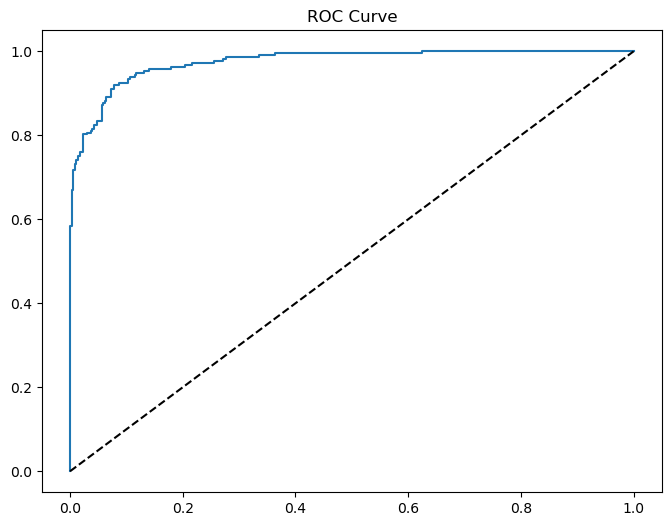

In [65]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_scores = model_lor.predict_proba(X)[:,1]

fpr, tpr, thresholds = roc_curve(y, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'k--',label='Random')
plt.title('ROC Curve')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y, pred_proba)
    print('오차 행렬')
    print(confusion)

* ROC AUC 값

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y, y_scores)
print(f"ROC AUC Score: {roc_auc: .4f}")

ROC AUC Score:  0.9741
